Nama : Muhammad Rayyan Aqiilah Manna

NIM : 1103210210

Tugas : Tugas Week 7 XGBoost on melb_data dataset

Dataset : melb_data.csv

Dokumentasi ChatGPT : https://chat.openai.com/share/d2349fcf-62f9-4f1b-a44b-905613dfff67

#Mount Google Drive to Colab

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Library

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns

#Loading Data

In [45]:
# Load the data
data_path = "/content/drive/MyDrive/Dataset/melb_data.csv"
df = pd.read_csv(data_path)

In [46]:
df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


#Menganalisis dan Cleaning Data

Mengecek kolom yang memiliki nilai kosong atau missing value

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

Menyingkirkan kolom yang memiliki missing values

In [48]:
# Drop missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 15395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6196 non-null   int64  
 1   Suburb         6196 non-null   object 
 2   Address        6196 non-null   object 
 3   Rooms          6196 non-null   int64  
 4   Type           6196 non-null   object 
 5   Price          6196 non-null   float64
 6   Method         6196 non-null   object 
 7   SellerG        6196 non-null   object 
 8   Date           6196 non-null   object 
 9   Distance       6196 non-null   float64
 10  Postcode       6196 non-null   float64
 11  Bedroom2       6196 non-null   float64
 12  Bathroom       6196 non-null   float64
 13  Car            6196 non-null   float64
 14  Landsize       6196 non-null   float64
 15  BuildingArea   6196 non-null   float64
 16  YearBuilt      6196 non-null   float64
 17  CouncilArea    6196 non-null   object 
 18  Lattitude   

Menampilkan matrix correlation untuk menganalisis dan menemukan data yang berkorelasi

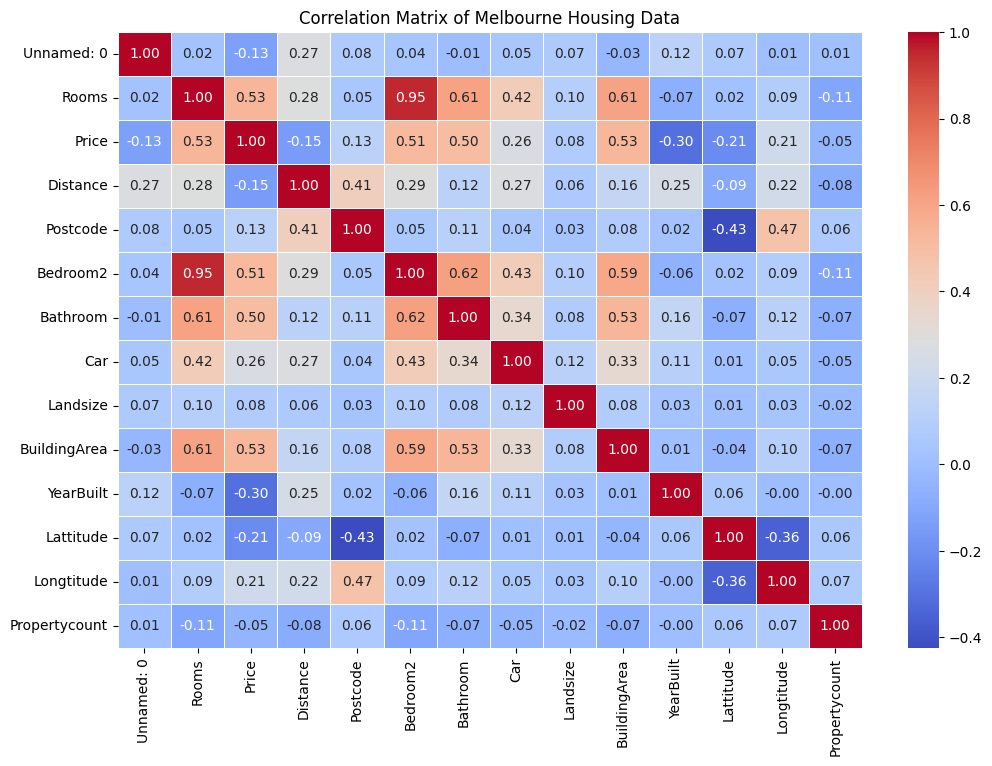

In [49]:
# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Melbourne Housing Data')
plt.show()

Menentukan kolom yang berkorelasi dari grafik hasil visualisasi diatas

In [50]:
# Specify columns to select
selected_columns = ['Price','Rooms', 'Bedroom2', 'Bathroom', 'BuildingArea']

# Select the specified columns
df = df[selected_columns].dropna()

Menentukan kolom yang dipilih sebagai model training dan menentukan 'Price' untuk menjadi variabel yang akan di predict

In [51]:
# Split the data
X = df.drop('Price', axis=1) # Features
y = df['Price'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Train models
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Hasil evaluasi menggunakan MAE masing-masing model

In [53]:
# Mean Absolute Error (MAE)
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)

dt_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)

xgb_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

print("Random Forest MAE:", rf_mae)
print("Decision Tree MAE:", dt_mae)
print("XGBoost MAE:", xgb_mae)

Random Forest MAE: 366741.26514289743
Decision Tree MAE: 399629.0208667166
XGBoost MAE: 356822.4528812534


Dari hasil evaluasi, maka dapat dikatakan bahwa XGBoost memiliki kinerja lebih baik daripada Random Forest dan Decision Tree